In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage import color, filters, measure, morphology, draw
import os

%matplotlib widget

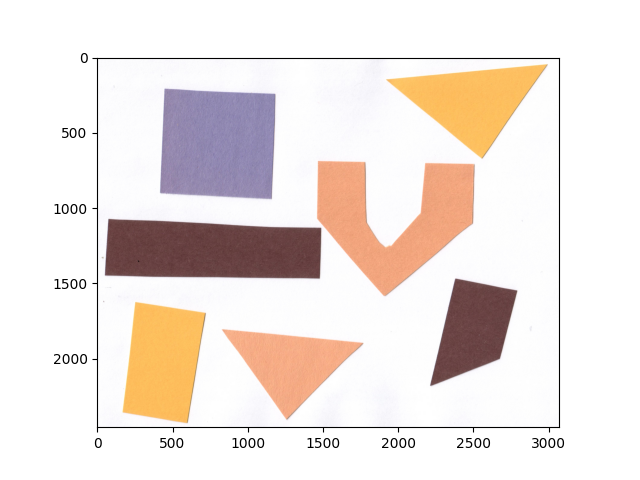

In [2]:
shapes = iio.imread("../data/shapes-01.jpg")

def show(img, cmap = None):
    fig, ax = plt.subplots()
    plt.imshow(img, cmap = cmap)
    
show(shapes)

In [3]:
def connected_components(
    img,
    sigma,
    thresh,
    neighborhood = 2,  # discuss 1- and 2-neighboorhoods with rubik's cube
):
    
    gray_img = color.rgb2gray(img)
    blurred = filters.gaussian(gray_img, sigma)
    mask = blurred < thresh

    labeled_img, n_objects = measure.label(mask,
                                       connectivity=neighborhood,
                                       return_num = True)
    
    
    return labeled_img, n_objects
    

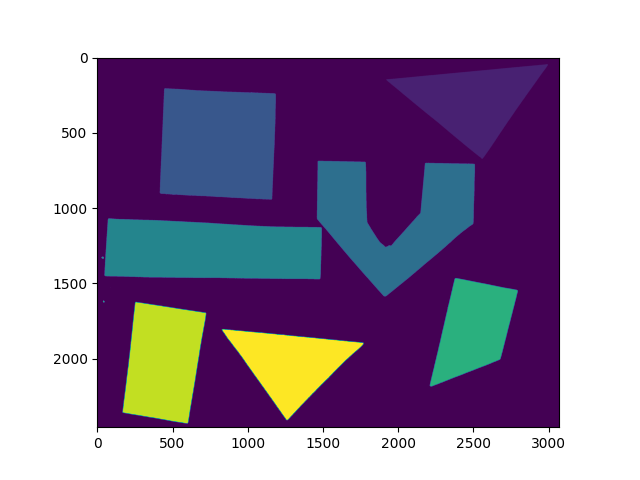

In [4]:
labeled_img, count = connected_components(shapes, 2, 0.9)
show(labeled_img)

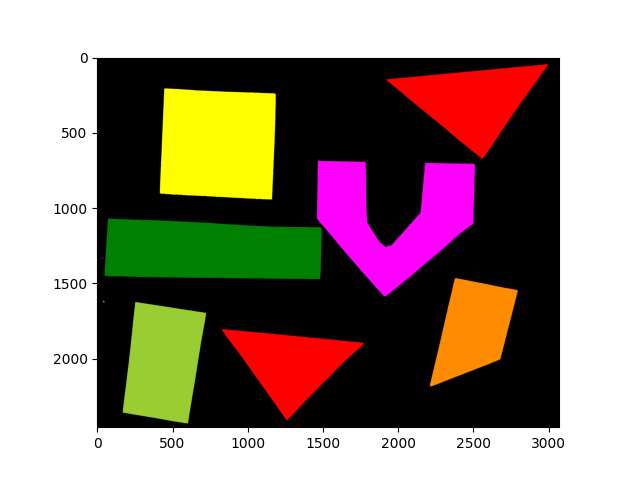

In [5]:
colored_labeled_img = color.label2rgb(labeled_img, bg_label=0)
show(colored_labeled_img)

## Exercise 1
line 251?

1. Using the `connected_components` function, find two ways of outputting the number of objects found.
2. Does this number correspond with your expectation? Why/why not?
3. Play around with the `sigma` and `thresh` parameters.  
    a. How do these parameters influence the number of objects found?  
    b. OPTIONAL: Can you find a set of parameters that will give you the expected number of objects?

Put your green sticky up when you've finished with 3a

### Get a list of the labeled objects

In [6]:
roi_list = measure.regionprops(labeled_img)

def get_object_area(roi_list):
    return [roi.area for roi in roi_list]

areas = get_object_area(roi_list)
areas

[318539, 1, 523207, 496622, 517330, 143, 256215, 1, 69, 338787, 265767]

Text(0, 0.5, 'Number of objects')

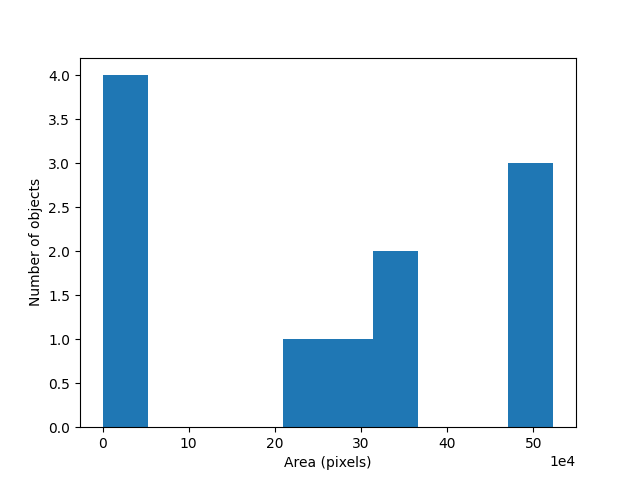

In [7]:
fig, ax = plt.subplots()
plt.hist(areas)
plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
plt.xlabel('Area (pixels)')
plt.ylabel('Number of objects')

In [8]:
min_area = 1e5
large_rois = [roi.area for roi in roi_list if roi.area > min_area]
print(large_rois)
print(f'number of large rois: {len(large_rois)}')


[318539, 523207, 496622, 517330, 256215, 338787, 265767]
number of large rois: 7


## Exercise 2
line 261?

Adjust the `connected_components` function so that it allows `min_area` as an input argument, and only outputs regions above this minimum.

HINT: check out the [skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html) library.

BONUS: explore other morphometrics from skimage.measure.regionprops
1. output the centroid position for each object (above the threshold)
2. consider whether you would export or filter by other properties for your own data and/or in what type of images these could be meaningfull


# Capstone Challenge

line 274?

Solution:

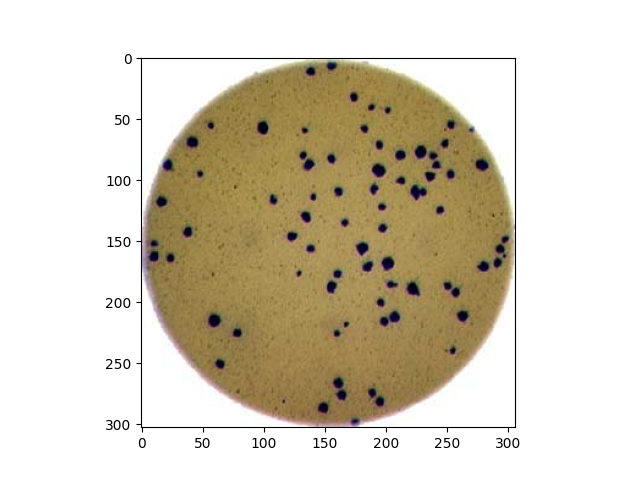

In [9]:
file = '../data/colonies-02.tif'


show(iio.imread(file))

In [12]:
# 1. create connected components function as above 
# but with the filename instead of the image
# 2. remove small objects (from mask!) as in exercise 2
# 3. create color labeled im as above
# 4. overlay this on top of the grayscale image


def output_overlay(
    filename,
    sigma,
    thresh,
    neighborhood = 2,
    min_area = 0,
):
    # 1. create connected components function as above,
    # but with the filename instead of the image
    
    img = iio.imread(filename)
    gray_img = color.rgb2gray(img)
    blurred = filters.gaussian(gray_img, sigma)
    mask = blurred < thresh

    # 2. remove small objects (from mask!) as in exercise 2
    mask = morphology.remove_small_objects(mask, 
                                           min_area,
                                           connectivity=neighborhood)

    labeled_img, n_objects = measure.label(mask,
                                           connectivity=neighborhood,
                                           return_num = True)
    
    # 3. create color labeled im as above
    colonies = color.label2rgb(labeled_img, bg_label=0)
    
    # 4. overlay this on top of the grayscale image
    overlay_img = color.gray2rgb(gray_img)
    overlay_img[mask] = colonies[mask]
    
    # 5. find the areas
    roi_list = measure.regionprops(labeled_img)
    areas = [roi.area for roi in roi_list]
    
    # 6 create outputs
    print(f'The number of colonies found on plate {os.path.basename(filename)} is {n_objects}')
    print(f'The average area of colonies is {np.mean(areas):.2f} pixels')
    print(f'The total area of colonies is {int(np.sum(areas))} pixels')

    
    # BONUS:
    roi_list = measure.regionprops(labeled_img, gray_img)
    mean_intensities = [roi.intensity_mean for roi in roi_list]
    min_index = mean_intensities.index(min(mean_intensities))
    bbox = roi_list[min_index].bbox
    
    ry, cx = draw.rectangle_perimeter(start=(bbox[0]-5,bbox[1]-5), end=(bbox[2]+5, bbox[3]+5))
    overlay_img[ry, cx] = 0
    
    outfile = './' + os.path.basename(filename)[:-4] + '_overlay.png'
    plt.savefig(format='png', fname=outfile)
    
    show(overlay_img)

The number of colonies found on plate colonies-03.tif is 353
The average area of colonies is 34.80 pixels
The total area of colonies is 12284 pixels


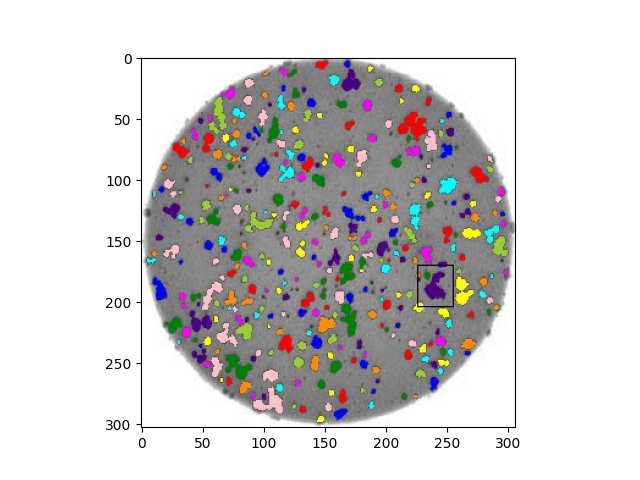

In [13]:
file = '../data/colonies-03.tif'

output_overlay(file, 0.3, 0.3, neighborhood=1, min_area = 5)